## PyOD in Python

### RIHAD VARIAWA

PyOD for Outlier Detection - This is a scalable Python toolkit for detecting outliers in multivariate data. It provides access to around 20 outlier detection algorithms under a single [well-documented](https://pyod.readthedocs.io/en/latest/) API.

#### Features of PyOD
PyOD has several advantages and comes with quite a few useful features. Here's my pick of the bunch:

* Open Source with detailed documentation and examples across various algorithms
* Supports advanced models, including Neural Networks, Deep Learning, and Outlier Ensembles

Note that PyOD also contains some neural network based models which are implemented in Keras. PyOD will NOT install Keras or TensorFlow automatically. You will need to install Keras and other libraries manually if you want to use neural net-based models.

In [1]:
# install PyOD
!pip install pyod

# to ensure latest version installed
!pip install --upgrade pyod

Requirement already up-to-date: pyod in ./anaconda3/lib/python3.7/site-packages (0.7.4)


## PyOD on a Simulated Dataset

In [2]:
# import required libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

Now, we’ll import the models we want to use to detect the outliers in our dataset. We will be using ABOD (Angle Based Outlier Detector) and KNN (K Nearest Neighbors)

In [3]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

Now, we will create a random dataset with outliers and plot it.

Text(0, 0.5, 'F2')

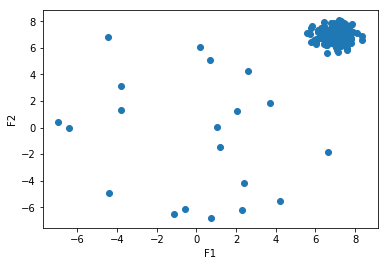

In [4]:
from pyod.utils.data import generate_data, get_outliers_inliers

# generate random data w/ two features
X_train, Y_train = generate_data(n_train=200,train_only=True,n_features=2)

# by default the outlierfraction is 0.1 in generate data function
outlier_fraction = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train, Y_train)

n_outliers = len(x_outliers)
n_inliers = len(x_inliers)

# separate the two features and use it to plot the data
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

# create a meshgrid
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2')

In [ ]:
# create a dictionary and add all the models that you want to use
# to detect the outliers
classifiers = {
    'Angle-based Outlier Detection (ABOD)' : ABOD(contamination=outlier_fraction),
    'K Nearest Neighbors (KNN)' : KNN(contamination=outlier_fraction)
}

Fit the data to each model we have added in the dictionary, Then, see how each model is detecting outliers

No of Errors :  Angle-based Outlier Detection (ABOD) 0


/Users/claireleannesaunders/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


No of Errors :  K Nearest Neighbors (KNN) 0


/Users/claireleannesaunders/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


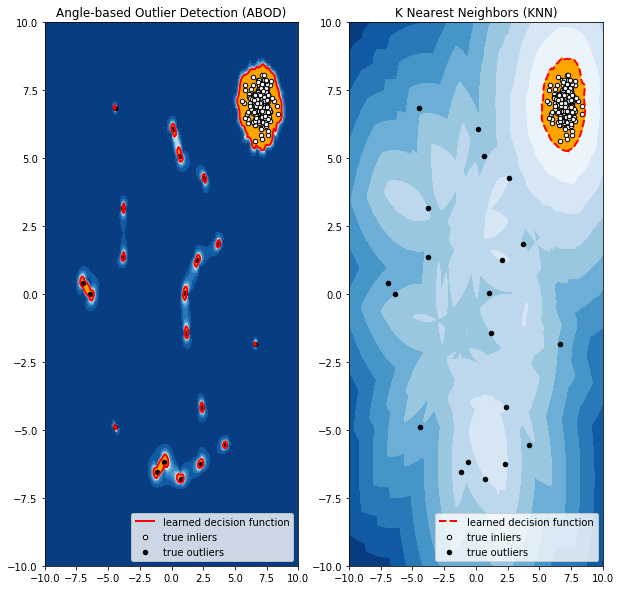

In [ ]:
# set the figure size
plt.figure(figsize=(10, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
    
plt.show() 

## Great!

### Now, let’s see how PyOD does on a real world dataset: Big Mart Sales Problem.

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

In [ ]:
# reading big_mart_training_data
df = pd.read_csv('dataset/Train_UWu5bXk.csv')

Let’s plot Item MRP vs Item Outlet Sales to understand the data

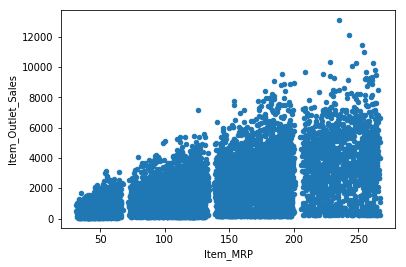

In [ ]:
df.plot.scatter('Item_MRP', 'Item_Outlet_Sales')

The range of Item Outlet Sales is from 0 to 12,000 and Item MRP is from 0 to 250. We will scale down both these features to a range between 0 and 1. This is required to create a explainable visualization (it will become way too stretched otherwise). As for this data, using the same approach will take much more time to create the visualization.

Note: If you don’t want the visualization, you can use the same scale to predict whether a point is an outlier or not.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[['Item_MRP', 'Item_Outlet_Sales']] = scaler.fit_transform(df[['Item_MRP', 'Item_Outlet_Sales']])
df[['Item_MRP', 'Item_Outlet_Sales']].head()

,Item_MRP,Item_Outlet_Sales
0,0.927507,0.283587
1,0.072068,0.031419
2,0.468288,0.158115
3,0.640093,0.053555
4,0.095805,0.073651


Store these values in the NumPy array for using in our models later

In [ ]:
X1 = df['Item_MRP'].values.reshape(-1, 1)
X2 = df['Item_Outlet_Sales'].values.reshape(-1, 1)

X = np.concatenate((X1, X2), axis=1)

Again, we will create a dictionary. But this time, we will add some more models to it and see how each model predicts outliers.

You can set the value of the outlier fraction according to your problem and your understanding of the data. In our example, I want to detect 5% observations that are not similar to the rest of the data. So, I’m going to set the value of outlier fraction as 0.05.

In [ ]:
random_state =np.random.RandomState(42)
outliers_fraction = 0.05

# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

Now, we will fit the data to each model one by one and see how differently each model predicts the outliers.

OUTLIERS :  447 INLIERS :  8076 Angle-based Outlier Detector (ABOD)


/Users/claireleannesaunders/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


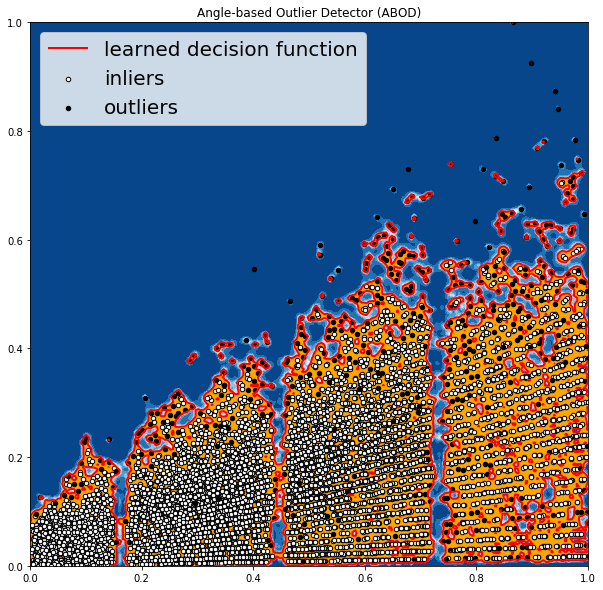

OUTLIERS :  427 INLIERS :  8096 Cluster-based Local Outlier Factor (CBLOF)


/Users/claireleannesaunders/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


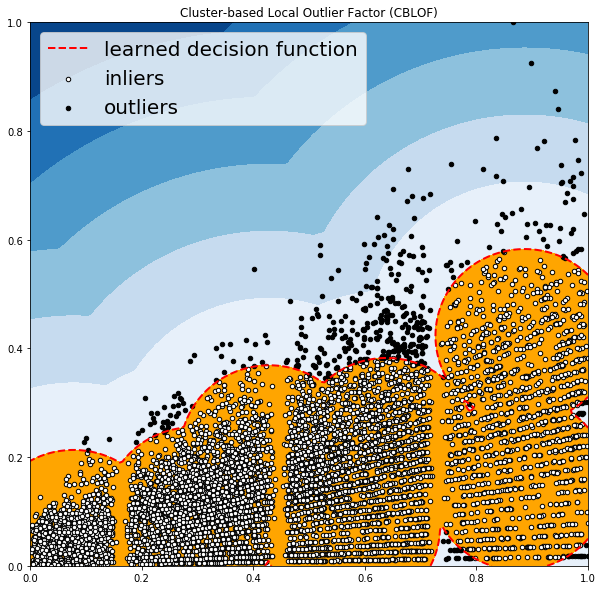

In [ ]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['Item_MRP'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['Item_MRP'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

In the above plots, the white points are inliers surrounded by red lines, and the black points are outliers in the blue zone.